In [78]:
import pandas as pd 
import numpy as np

In [79]:
walmart_df=pd.read_csv('walmart_data.csv')

In [80]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [81]:
walmart_df.shape

(550068, 10)

In [82]:
walmart_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [83]:
def print_unq_values(df):
    for column in df.columns:
        unique_value=df[column].unique()
        print(f"unique value of {column}:", unique_value)

In [84]:
print_unq_values(walmart_df)

unique value of User_ID: [1000001 1000002 1000003 ... 1004113 1005391 1001529]
unique value of Product_ID: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
unique value of Gender: ['F' 'M']
unique value of Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
unique value of Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
unique value of City_Category: ['A' 'C' 'B']
unique value of Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']
unique value of Marital_Status: [0 1]
unique value of Product_Category: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
unique value of Purchase: [ 8370 15200  1422 ...   135   123   613]


In [85]:
def print_count (df):
    for column in df.columns:
        unique_value=df[column].nunique()
        print(f"Unique values in {column}:",unique_value)

In [86]:
print_count(walmart_df)

Unique values in User_ID: 5891
Unique values in Product_ID: 3631
Unique values in Gender: 2
Unique values in Age: 7
Unique values in Occupation: 21
Unique values in City_Category: 3
Unique values in Stay_In_Current_City_Years: 5
Unique values in Marital_Status: 2
Unique values in Product_Category: 20
Unique values in Purchase: 18105


In [87]:
# Data Cleaning

In [88]:
walmart_df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [89]:
walmart_df['Stay_In_Current_City_Years']=walmart_df['Stay_In_Current_City_Years'].str.replace("+","")

In [99]:
walmart_df['Stay_In_Current_City_Years']=pd.to_numeric(walmart_df['Stay_In_Current_City_Years'])

In [100]:
walmart_df.select_dtypes(include=['int64']).skew()

User_ID                       0.003066
Occupation                    0.400140
Stay_In_Current_City_Years    0.317236
Marital_Status                0.367437
Product_Category              1.025735
Purchase                      0.600140
dtype: float64

In [101]:
walmart_df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,3.000000,1.000000,8.000000,12054.000000


In [102]:
#null value detection
walmart_df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [103]:
walmart_df.duplicated(subset=None,keep='first').sum()


0

In [104]:
#Data Visualization

In [105]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


In [106]:
walmart_df.select_dtypes(include=['int64']).columns

Index(['User_ID', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category', 'Purchase'],
      dtype='object')

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

<Axes: xlabel='Purchase', ylabel='Count'>

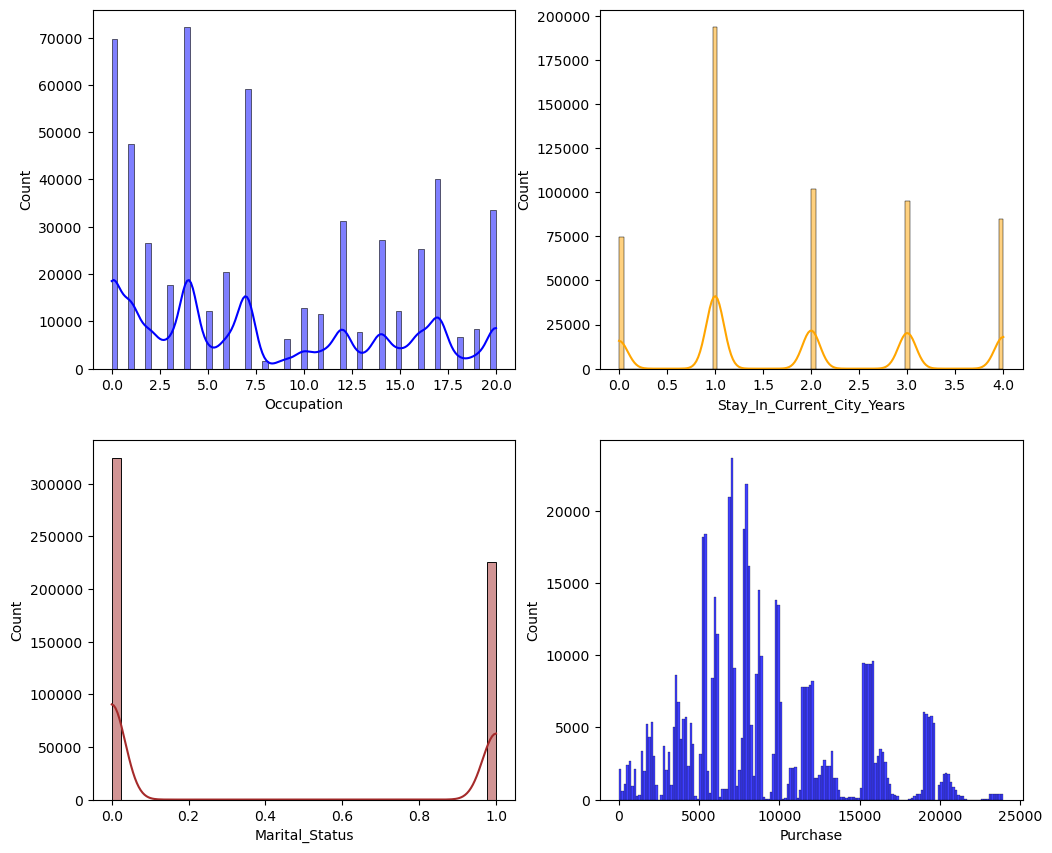

In [176]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=0.9) 
sns.histplot(walmart_df['Occupation'],kde=True,ax=axis[0,0],color='blue')
sns.histplot(walmart_df['Stay_In_Current_City_Years'],kde=True,ax=axis[0,1],color='orange')
sns.histplot(walmart_df['Marital_Status'], kde=True, ax=axis[1,0], color='brown')

sns.histplot(walmart_df['Purchase'], ax=axis[1,1], color='blue')



Text(0.5, 1.0, 'City_Category')

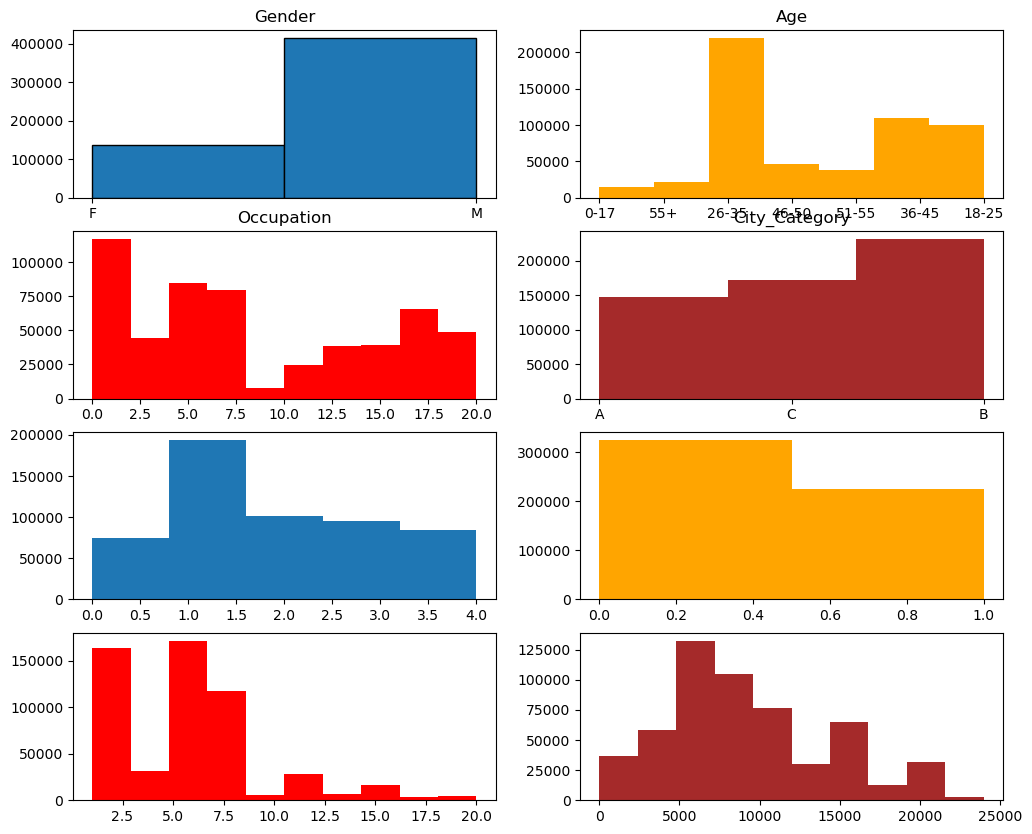

In [186]:
fig,axis=plt.subplots(nrows=4,ncols=2,figsize=(12,10))
axis[0,0].hist(walmart_df['Gender'],bins=2,edgecolor='black')
axis[0,1].hist(walmart_df['Age'],bins=7,color='orange')
axis[1,0].hist(walmart_df['Occupation'],color='red')
axis[1,1].hist(walmart_df['City_Category'],bins=3,color='brown')
axis[0, 0].set_title('Gender')
axis[2,0].hist(walmart_df['Stay_In_Current_City_Years'],bins=5)
axis[2,1].hist(walmart_df['Marital_Status'],bins=2,color='orange')
axis[3,0].hist(walmart_df['Product_Category'],color='red')
axis[3,1].hist(walmart_df['Purchase'],color='brown')
axis[0, 1].set_title('Age')
axis[1, 0].set_title('Occupation')
axis[1, 1].set_title('City_Category')

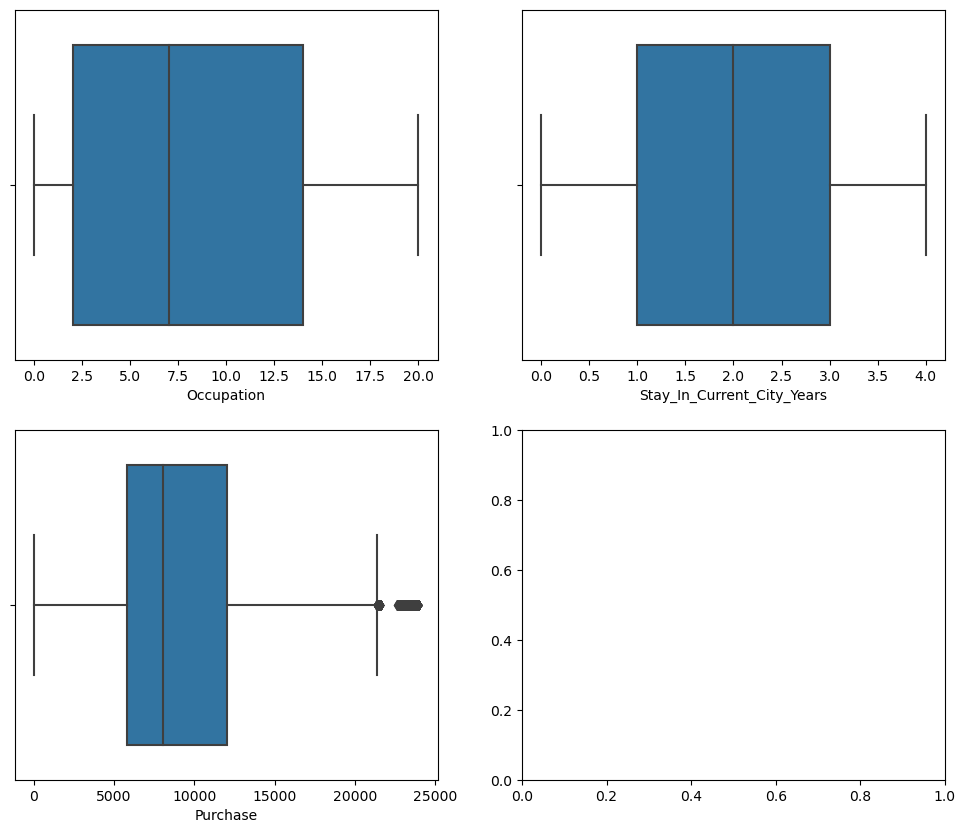

In [197]:
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(12,10))

sns.boxplot(walmart_df,x="Occupation",ax=axis[0,0])
sns.boxplot(data=walmart_df, x="Stay_In_Current_City_Years", orient='h', ax=axis[0,1])
sns.boxplot(data=walmart_df, x="Purchase", orient='h', ax=axis[1,0])


plt.show()

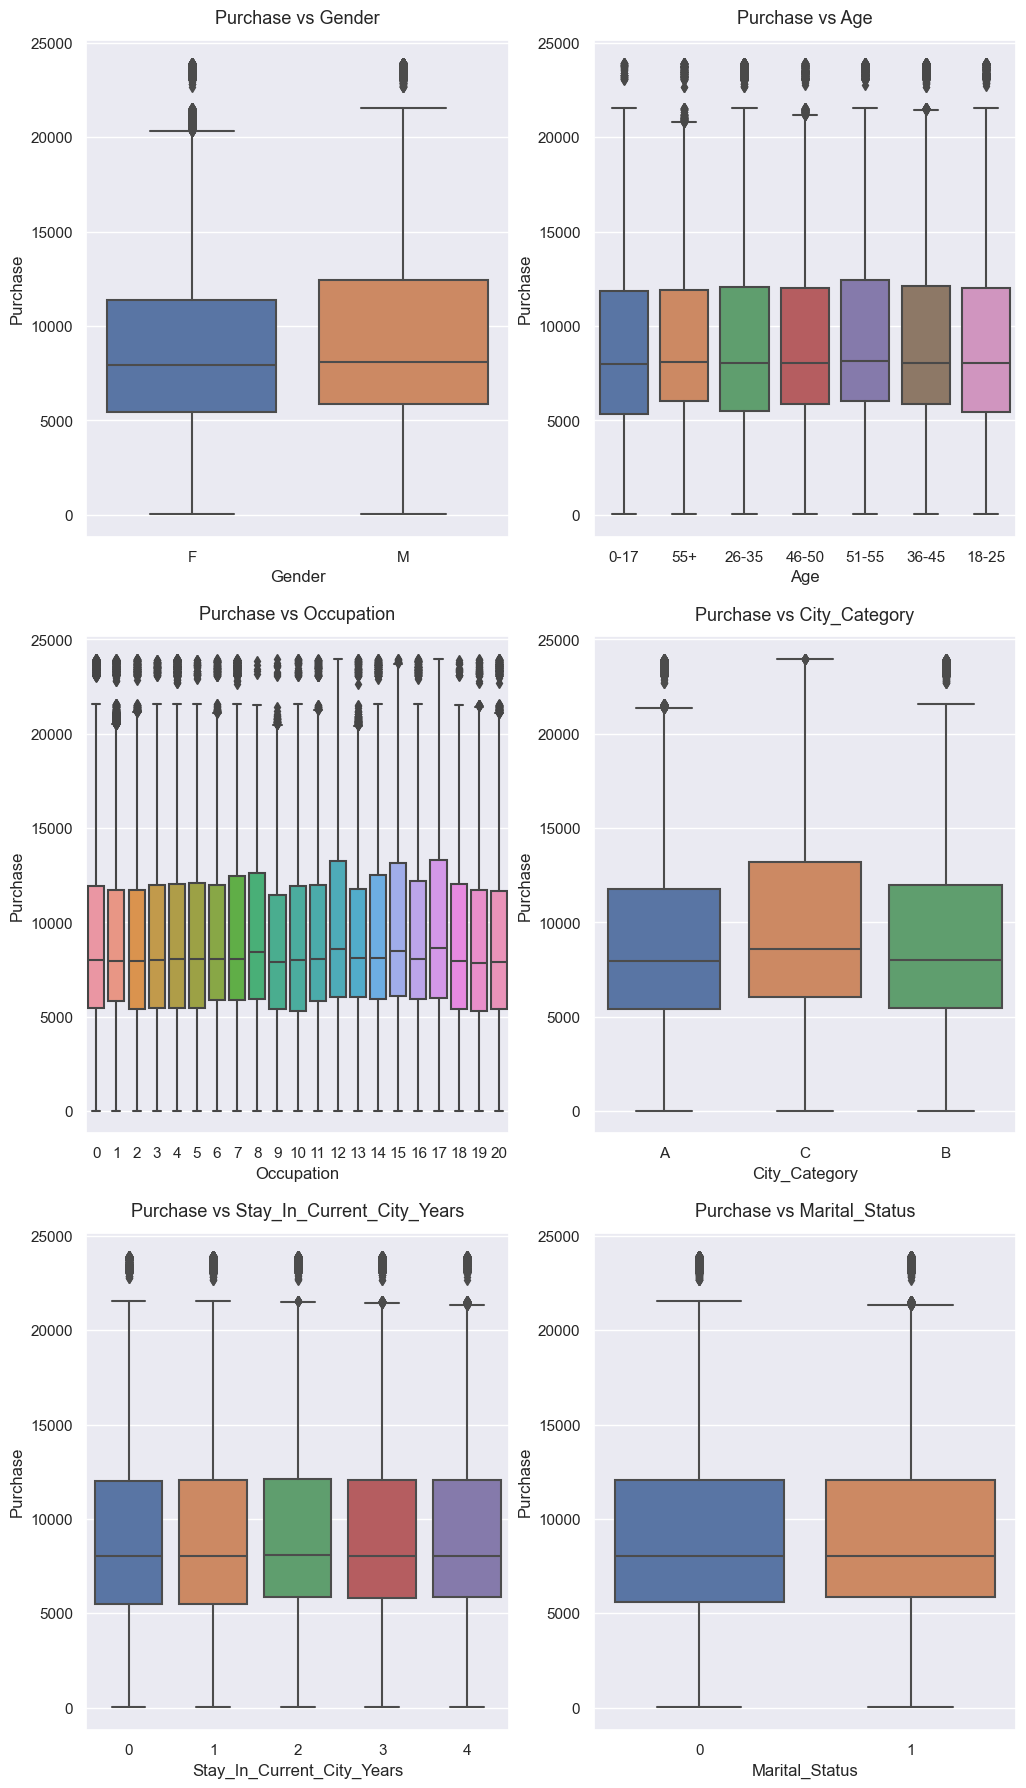

In [215]:
attrs = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
sns.set(color_codes = True)
fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,10))
count=0
fig.subplots_adjust(top=1.8)
for row in range(3):
    for col in range(2):
        sns.boxplot(data=walmart_df,y='Purchase',x=attrs[count],ax=axis[row,col])
        axis[row,col].set_title(f"Purchase vs {attrs[count]}",pad=12,fontsize=13)
        count+=1
plt.show()
        


<Axes: xlabel='Product_Category', ylabel='Purchase'>

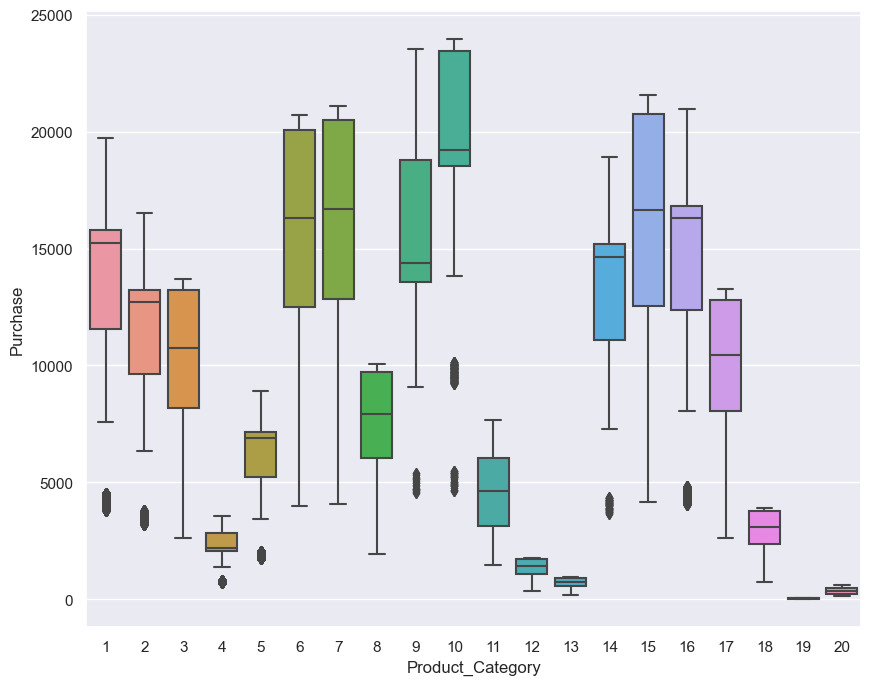

In [217]:
plt.figure(figsize=(10,8))
sns.boxplot(data=walmart_df,x=attrs[-1],y='Purchase')

In [233]:
amt_df=walmart_df.groupby(['User_ID','Gender'])[['Purchase']].sum()

In [236]:
avg_amt_df=amt_df.reset_index()
avg_amt_df

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [238]:
avg_amt_df['Gender'].value_counts()

Gender
M    4225
F    1666
Name: count, dtype: int64

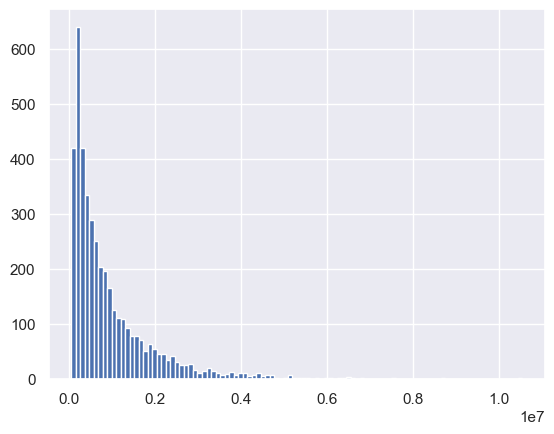

In [253]:
avg_male_df=avg_amt_df[avg_amt_df['Gender']=='M']['Purchase'].hist(bins=100)

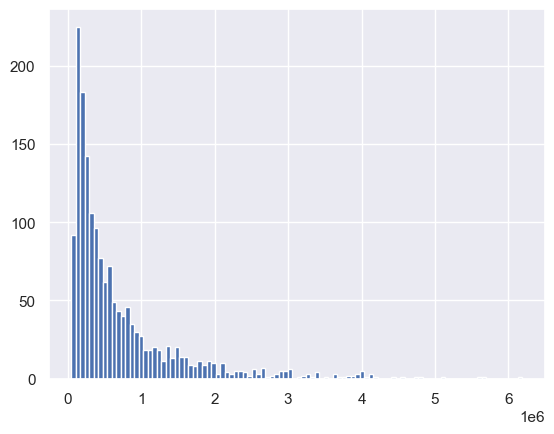

In [260]:
avg_male_df=avg_amt_df[avg_amt_df['Gender']=='F']['Purchase'].hist(bins=100)


In [274]:
male_avg = avg_amt_df[avg_amt_df['Gender']=='M']['Purchase'].mean()
female_avg = avg_amt_df[avg_amt_df['Gender']=='F']['Purchase'].mean()

print("Average amount spend by Male customers: {:.2f}".format(male_avg))
print("Average amount spend by Female customers: {:.2f}".format(female_avg))

Average amount spend by Male customers: 925344.40
Average amount spend by Female customers: 712024.39


In [276]:
avg_amt_df['Purchase'].min()

46681

In [295]:
male_df = avg_amt_df[avg_amt_df['Gender']=='M']
female_df = avg_amt_df[avg_amt_df['Gender']=='F']

genders = ["M", "F"]

male_sample_size = 3000
female_sample_size = 1500
num_repitions = 1000
male_means = []
female_means = []

for _ in range(num_repitions):
    male_mean = male_df.sample(male_sample_size, replace=True)['Purchase'].mean()
    female_mean = female_df.sample(female_sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)
    


1000

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  1.,  2.,
         0.,  1.,  2.,  1.,  3.,  3.,  0.,  4.,  2.,  3.,  3.,  3.,  2.,
         6., 11.,  5., 15.,  7.,  9.,  8.,  5., 13., 13., 21.,  7., 16.,
        15., 21., 12., 18., 16., 22., 12., 27., 19., 25., 28., 24., 26.,
        29., 27., 23., 37., 26., 31., 21., 23., 22., 19., 22., 21., 17.,
        17., 17., 17., 18., 12., 18., 16., 18., 15.,  8.,  9., 11., 10.,
         4.,  3.,  8.,  3.,  7.,  2.,  4.,  8.,  4.,  1.,  2.,  1.,  4.,
         1.,  1.,  2.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([861888.97966667, 863063.66627   , 864238.35287333, 865413.03947667,
        866587.72608   , 867762.41268333, 868937.09928667, 870111.78589   ,
        871286.47249333, 872461.15909667, 873635.8457    , 874810.53230333,
        875985.21890667, 877159.90551   , 878334.59211333, 879509.27871667,
        880683.96532   , 881858.65192333, 883033.33852667, 884208.02513   ,
        885382.71173333, 886557.39833667, 887732.08494

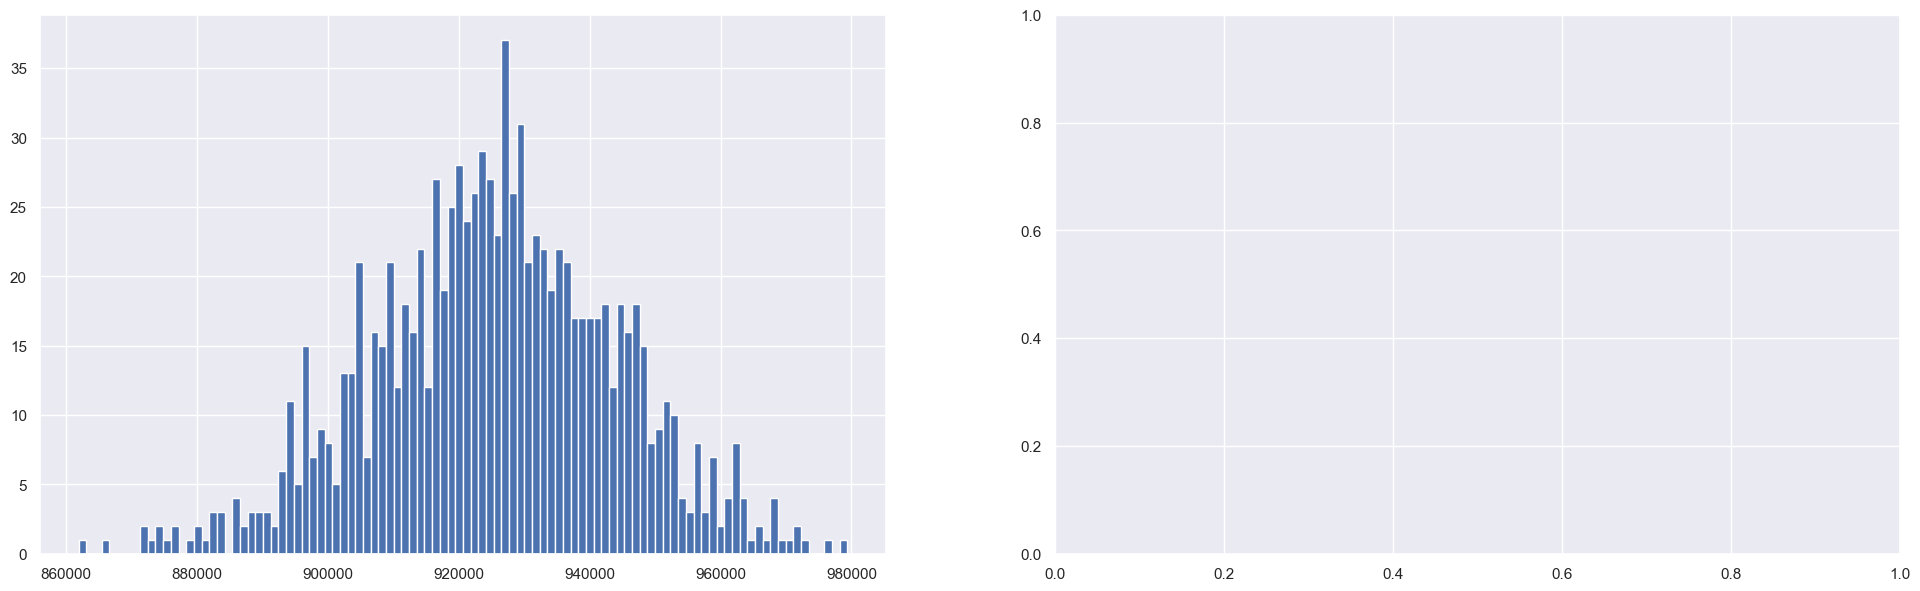

In [292]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(24,7))
axis[0].hist(male_means,bins=100)